# Importing Necessary Modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import median
import re
from tabulate import tabulate

%matplotlib inline 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading the AirBnB data which has information on our listings. The info will be used to calculate the revenue generated by these properties

In [85]:
revenue_df = pd.read_csv("listings.csv")

In [86]:
revenue_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,20170502132028,2017-05-03,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle français et anglais, (lire Français c...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,...,10.000,f,nan,NaN,f,moderate,t,t,1,1.590
1,16042478,https://www.airbnb.com/rooms/16042478,20170502132028,2017-05-04,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You’ll love my...,(URL HIDDEN),My place is close to Sea Shore. You’ll love my...,none,(URL HIDDEN),...,nan,f,nan,NaN,t,flexible,f,f,1,nan
2,1886820,https://www.airbnb.com/rooms/1886820,20170502132028,2017-05-04,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,nan,f,nan,NaN,f,strict,f,f,1,nan
3,6627449,https://www.airbnb.com/rooms/6627449,20170502132028,2017-05-05,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,10.000,f,nan,NaN,f,strict,f,f,1,0.540
4,5557381,https://www.airbnb.com/rooms/5557381,20170502132028,2017-05-04,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",none,"City Island is unique in two ways. First, you ...",...,10.000,f,nan,NaN,t,moderate,f,f,1,3.630


# Data Preparation: For the scope of this project, we are focussing on understanding zip codes which would generate the most profit on short term rentals within New York City for two bedroom properties. So, we will only retain rows which are in NY state, and has two bedrooms

In [87]:
revenue_df['state'].value_counts()

NY          40744
ny              5
VT              1
NJ              1
MP              1
New York        1
Name: state, dtype: int64

In [88]:
revenue_df['bedrooms'].value_counts()

1.000     30296
2.000      4894
0.000      3525
3.000      1458
4.000       375
5.000        87
6.000        29
7.000         8
8.000         7
10.000        3
9.000         2
Name: bedrooms, dtype: int64

In [89]:
revenue_df = revenue_df[((revenue_df['state'] == 'NY') | (revenue_df['state'] == 'New York') | (revenue_df['state'] == 'ny'))]

In [90]:
revenue_df['state'].value_counts()

NY          40744
ny              5
New York        1
Name: state, dtype: int64

In [91]:
revenue_df = revenue_df[(revenue_df['bedrooms'] == 2)]

In [92]:
revenue_df['bedrooms'].value_counts()

2.000    4893
Name: bedrooms, dtype: int64

# Data Pre-Processing and Data Cleaning: The dataset has 95 columns. For the scope of this project, I will remove columns containing irrelevant information when the property is invested in, by the real estate company. I will also remove columns with high number of missing values

In [93]:
revenue_df.shape

(4893, 95)

In [94]:
revenue_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [95]:
revenue_df = revenue_df[['last_scraped','host_response_time', 'host_response_rate',
       'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode','latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds',
       'price', 'weekly_price', 'monthly_price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'instant_bookable']]

In [96]:
revenue_df.head()

,last_scraped,host_response_time,host_response_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,...,monthly_price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable
12,2017-05-03,NaN,NaN,Allerton,Bronx,10462,40.858,-73.866,Apartment,Entire home/apt,...,NaN,0,0,0,0,4,2016-07-11,2016-11-07,85.000,f
23,2017-05-04,within an hour,100%,Allerton,Bronx,10469,40.871,-73.847,Apartment,Entire home/apt,...,NaN,22,50,75,346,31,2015-02-19,2017-04-26,95.000,f
33,2017-05-05,NaN,NaN,Ditmars Steinway,Queens,11102,40.772,-73.918,Apartment,Entire home/apt,...,NaN,0,0,0,0,0,NaN,NaN,nan,f
36,2017-05-05,NaN,NaN,Ditmars Steinway,Queens,11102,40.779,-73.916,Apartment,Private room,...,NaN,30,60,90,180,0,NaN,NaN,nan,t
38,2017-05-04,within an hour,95%,Ditmars Steinway,Queens,11105,40.781,-73.910,Apartment,Entire home/apt,...,NaN,27,57,87,362,1,2017-04-11,2017-04-11,60.000,f


In [97]:
revenue_df.shape

(4893, 26)

# Missing and NA Data Handling: I will replace na values with mode for categorical variable except the zipcode field. For zipcode, we will use latitude and longitude field to find out the zip code. Also, the na values for first_review and last_review will be replaced with 0. 

In [98]:
revenue_df.isna().sum()

last_scraped                       0
host_response_time              1308
host_response_rate              1308
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
zipcode                           62
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          8
bedrooms                           0
beds                               3
price                              0
weekly_price                    3862
monthly_price                   4042
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review                     971
last_review                      955
review_scores_rating            1019
instant_bookable                   0
dtype: int64

Removing the columns with high number of na values

In [99]:
revenue_df = revenue_df.drop(columns=['host_response_time', 'host_response_rate', 'weekly_price', 'monthly_price', 'review_scores_rating' ])

In [100]:
revenue_df.shape

(4893, 21)

To handle zipcode column, following strategies has been employed: 
    1. use the uszipcode library to find out zipcode using the latitude and longitude information 
    2. clean the zipcode column to follow 5 digit zipcode only

In [101]:
from uszipcode import Zipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

flag = 0
for index, row in revenue_df.iterrows():
    if pd.isna(row['zipcode']):
        flag += 1
        result = search.by_coordinates(row['latitude'], row['longitude'])
        zip_new = result[0]
        revenue_df.loc[index, "zipcode"] = int(zip_new.zipcode)
print(flag)

62


In [102]:
revenue_df['zipcode'].isna().sum()

0

In [103]:
revenue_df['zipcode'] = revenue_df['zipcode'].astype(str)

In [104]:
revenue_df.zipcode = revenue_df.zipcode.apply(lambda x: re.sub('-[0-9]*', '', x))

In [105]:
revenue_df['zipcode'] = revenue_df['zipcode'].apply(lambda x: re.sub('\.[0]', '', x))

In [106]:
revenue_df.zipcode.value_counts()

11211    297
11238    187
10002    172
11221    168
10009    160
11216    147
11215    144
10019    140
10003    134
11222    132
11206    113
10025    112
10036    108
11249    106
10011    106
10012    103
11233    102
10014     95
10027     95
11217     86
11205     84
10013     82
11231     74
10016     72
10024     71
11237     71
10031     71
11201     69
10023     65
10029     65
        ... 
10459      2
11378      2
10304      2
11426      2
11691      2
10475      2
10473      2
10306      2
10270      2
11433      1
11355      1
10103      1
11436      1
11432      1
10460      1
11360      1
10312      1
10310      1
10278      1
10162      1
10458      1
10308      1
10044      1
10461      1
10111      1
11219      1
11356      1
11420      1
10020      1
11379      1
Name: zipcode, Length: 151, dtype: int64

In [122]:
revenue_df['zipcode'] = revenue_df['zipcode'].astype(int)

In [108]:
revenue_df = revenue_df.fillna('0')

In [109]:
revenue_df.isna().sum()

last_scraped                    0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
zipcode                         0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
price                           0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
number_of_reviews               0
first_review                    0
last_review                     0
instant_bookable                0
dtype: int64

In [110]:
revenue_df['price'] = revenue_df['price'].str.replace('$', '')
revenue_df['price'] = revenue_df['price'].str.replace(',', '')

In [111]:
revenue_df['price'] = revenue_df['price'].astype(float)

In [112]:
revenue_df.head()

,last_scraped,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,beds,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,instant_bookable
12,2017-05-03,Allerton,Bronx,10462,40.858,-73.866,Apartment,Entire home/apt,4,1.000,...,2.000,130.000,0,0,0,0,4,2016-07-11,2016-11-07,f
23,2017-05-04,Allerton,Bronx,10469,40.871,-73.847,Apartment,Entire home/apt,16,1.000,...,4.000,150.000,22,50,75,346,31,2015-02-19,2017-04-26,f
33,2017-05-05,Ditmars Steinway,Queens,11102,40.772,-73.918,Apartment,Entire home/apt,4,1.000,...,2.000,200.000,0,0,0,0,0,0,0,f
36,2017-05-05,Ditmars Steinway,Queens,11102,40.779,-73.916,Apartment,Private room,4,1.000,...,4.000,250.000,30,60,90,180,0,0,0,t
38,2017-05-04,Ditmars Steinway,Queens,11105,40.781,-73.910,Apartment,Entire home/apt,6,1.000,...,5.000,79.000,27,57,87,362,1,2017-04-11,2017-04-11,f


In [113]:
revenue_df.shape

(4893, 21)

In [150]:
len(revenue_df.zipcode.unique())

151

# Loading the Cost data provided by Zillow; an estimate of value for two-bedroom properties. 

In [2]:
cost_df = pd.read_csv("Cost_Data.csv")

In [3]:
cost_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,nan,nan,nan,...,1374400,1364100,1366300,1354800.000,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.000,166400.000,166700.000,...,368600,370200,372300,375300.000,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,nan,nan,nan,...,1993500,1980700,1960900,1951300.000,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.000,193500.000,192600.000,...,398900,401200,403200,405700.000,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.000,60500.000,60900.000,...,82400,82300,82400,82300.000,82500,83200,83900,84100,83900,83700


In [4]:
cost_df.shape

(8946, 262)

# Data Preparation: We will be keeping only those rows which belong to NY state and discard others for this problem.

In [5]:
cost_df['State'].value_counts()

CA    1016
FL     716
PA     550
OH     509
NY     475
MA     438
IN     431
IL     316
WA     315
VA     299
NC     293
MI     261
CO     243
TX     241
CT     234
GA     225
MN     206
OR     190
NH     189
MO     171
NJ     160
TN     119
AZ     115
SC     105
WI     105
MD      93
KS      89
AL      87
KY      84
OK      80
NE      64
UT      63
NV      61
RI      60
IA      54
MS      48
HI      44
ID      33
DE      28
MT      23
NM      23
DC      21
LA      20
AR      18
AK      14
ND       8
WY       6
WV       3
Name: State, dtype: int64

In [16]:
cost_df = cost_df[cost_df['State'] == 'NY']
cost_df = cost_df[cost_df['City'] == 'New York']

In [17]:
cost_df.shape

(25, 262)

In [18]:
cost_df['City'].value_counts()

New York    25
Name: City, dtype: int64

# Data Cleaning and Handling Missing and invalid values: We see that few data is missing from early years. We will replace all na values with 0

In [19]:
cost_df.isna().sum()

RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
1996-04       17
1996-05       17
1996-06       17
1996-07       17
1996-08       17
1996-09       17
1996-10       17
1996-11       17
1996-12       17
1997-01       17
1997-02       17
1997-03       17
1997-04       17
1997-05       17
1997-06       17
1997-07       17
1997-08       17
1997-09       17
1997-10       17
1997-11       17
1997-12       17
1998-01       17
1998-02       17
              ..
2015-01        0
2015-02        0
2015-03        0
2015-04        0
2015-05        0
2015-06        0
2015-07        0
2015-08        0
2015-09        0
2015-10        0
2015-11        0
2015-12        0
2016-01        0
2016-02        0
2016-03        0
2016-04        0
2016-05        0
2016-06        0
2016-07        0
2016-08        0
2016-09        0
2016-10        0
2016-11        0
2016-12        0
2017-01        0
2017-02        0
2017-03        0
2017-04       

In [20]:
cost_df.isnull().sum()

RegionID       0
RegionName     0
City           0
State          0
Metro          0
CountyName     0
SizeRank       0
1996-04       17
1996-05       17
1996-06       17
1996-07       17
1996-08       17
1996-09       17
1996-10       17
1996-11       17
1996-12       17
1997-01       17
1997-02       17
1997-03       17
1997-04       17
1997-05       17
1997-06       17
1997-07       17
1997-08       17
1997-09       17
1997-10       17
1997-11       17
1997-12       17
1998-01       17
1998-02       17
              ..
2015-01        0
2015-02        0
2015-03        0
2015-04        0
2015-05        0
2015-06        0
2015-07        0
2015-08        0
2015-09        0
2015-10        0
2015-11        0
2015-12        0
2016-01        0
2016-02        0
2016-03        0
2016-04        0
2016-05        0
2016-06        0
2016-07        0
2016-08        0
2016-09        0
2016-10        0
2016-11        0
2016-12        0
2017-01        0
2017-02        0
2017-03        0
2017-04       

In [21]:
cost_df = cost_df.fillna(0)

# Before proceeding further, I am going to see the trend in increase of median price over the last 5 years as well as 2 years. We will calculate the median of medians for these years and then illustrate the trend using lineplot

In [23]:
cost_df_test = cost_df

In [24]:
cost_df_test.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,0.000,0.000,0.000,...,1374400,1364100,1366300,1354800.000,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,0.000,0.000,0.000,...,1993500,1980700,1960900,1951300.000,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,0.000,0.000,0.000,...,1526000,1523700,1527200,1541600.000,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,0.000,0.000,0.000,...,2354000,2355500,2352200,2332100.000,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,0.000,0.000,0.000,...,1932800,1930400,1937500,1935100.000,1915700,1916500,1965700,2045300,2109100,2147000


In [25]:
def calculateYearlyMedian(cost_df_test, year):
    for index, row in cost_df_test.iterrows():
        list_medians =[]
        temp_df = row.to_frame().reset_index()
        temp_df.columns = ['col', 'val']
        for i, j in temp_df.iterrows():
            if re.match(str(year)+'.*',j['col']):
                #print('i came here')
                list_medians.append(j['val'])
        #row[("median"+"_"+str(year))] = median(list_medians)
        cost_df_test.loc[index, (str(year))] = median(list_medians)

In [26]:
for item in range(2013, 2018):
    calculateYearlyMedian(cost_df_test, item)

In [27]:
cost_df_test.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2013,2014,2015,2016,2017
0,61639,10025,New York,NY,New York,New York,1,0.000,0.000,0.000,...,1317300,1333700,1352100,1390000,1431000,1045000.000,1141150.000,1224700.000,1361250.000,1342900.000
2,61637,10023,New York,NY,New York,New York,3,0.000,0.000,0.000,...,1929800,1955000,2022400,2095000,2142300,1496400.000,1729600.000,1724050.000,1913000.000,1988700.000
13,61703,10128,New York,NY,New York,New York,14,0.000,0.000,0.000,...,1582900,1598900,1646100,1720500,1787100,1168400.000,1225850.000,1362000.000,1525650.000,1622500.000
14,61625,10011,New York,NY,New York,New York,15,0.000,0.000,0.000,...,2319600,2342100,2365900,2419700,2480400,1798350.000,2029500.000,2066800.000,2268000.000,2354000.000
20,61617,10003,New York,NY,New York,New York,21,0.000,0.000,0.000,...,1916500,1965700,2045300,2109100,2147000,1533100.000,1735500.000,1809000.000,1935350.000,2005500.000


In [29]:
trend_df = cost_df_test[['RegionName', '2013', '2014', '2015', '2016', '2017']]

In [30]:
trend_df_new = pd.melt(trend_df, id_vars=["RegionName"], var_name="Year", value_name="Median_Price")

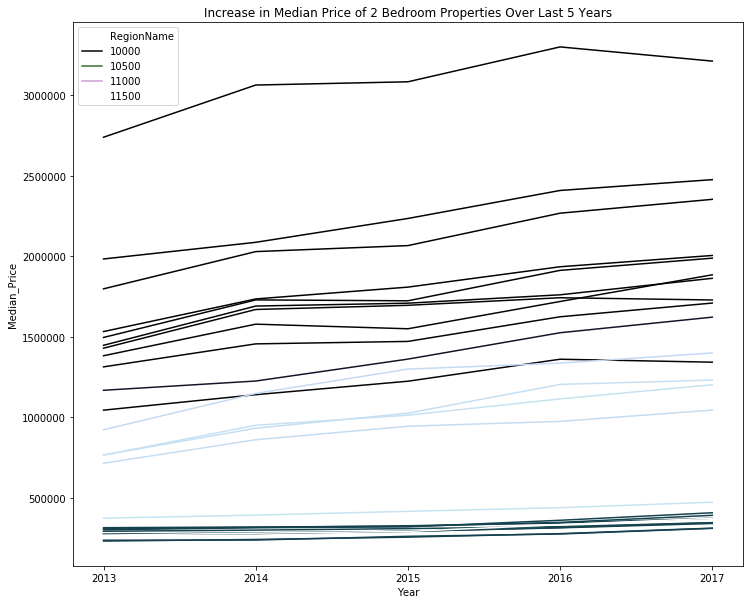

In [31]:
plt.figure(figsize=(12, 10))
sns.lineplot("Year", "Median_Price", data=trend_df_new, hue="RegionName", palette = "cubehelix")
plt.title("Increase in Median Price of 2 Bedroom Properties Over Last 5 Years")
plt.legend(prop={'size': 10})

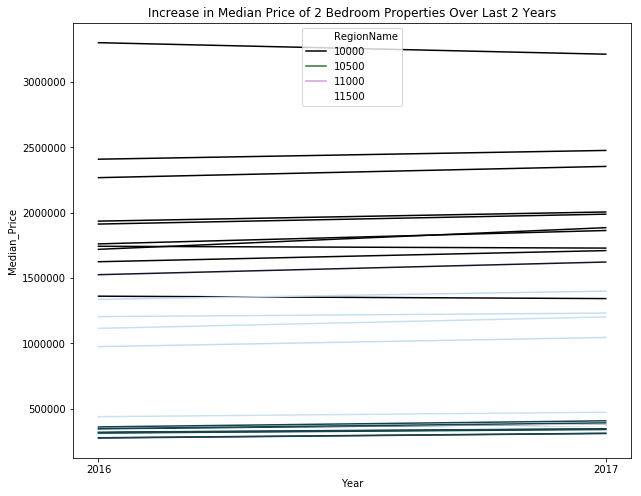

In [32]:
trend_df_2 = cost_df_test[['RegionName', '2016', '2017']]
trend_df_new = pd.melt(trend_df_2, id_vars=["RegionName"], var_name="Year", value_name="Median_Price")


plt.figure(figsize=(10, 8))
sns.lineplot("Year", "Median_Price", data=trend_df_new, hue="RegionName", palette = "cubehelix")
plt.title("Increase in Median Price of 2 Bedroom Properties Over Last 2 Years")
plt.legend(prop={'size': 10})

# From the 5-year trend analysis, it is observed that few regions show an increase in the median cost price such as zip code 10000, 12000 & 14000 but other regions see little change. 

# However, increase in median cost price measured for recent 2 consecutive years (2016,2017) shares a different story. The market has little or no fluctuation. Median Cost for regionName - 10000 which had an upward trend for over 4-5 years (2013-2016) has dropped slightly. Rest of the region have little or no increase. From above analysis, we are assuming that Median Cost Price for Homes have rather been stagnant for the past 2 years. Hence, we will choose median of medians price as the actual price for year 2017 for the two-bedroom properties across every regionName(zipcode). All further decisions will be made on this assumption.


In [33]:
final_cost_df = cost_df_test[['RegionName', 'SizeRank', '2017']] 
final_cost_df.columns = ['zipcode', 'PopulationRank', 'Cost_2017']

In [38]:
final_cost_df.reset_index(drop=True).head(10)

,zipcode,PopulationRank,Cost_2017
0,10025,1,1342900.000
1,10023,3,1988700.000
2,10128,14,1622500.000
3,10011,15,2354000.000
4,10003,21,2005500.000
5,11201,32,1400200.000
6,11234,52,473300.000
7,10314,68,345950.000
8,11215,71,1045400.000
9,10028,109,1885350.000


In [35]:
final_cost_df.isna().sum()

zipcode           0
PopulationRank    0
Cost_2017         0
dtype: int64

In [36]:
final_cost_df.shape

(25, 3)

In [151]:
len(final_cost_df.zipcode.unique())

25

In [125]:
revenue_df.shape

(4893, 21)

# Joining the Cost df and Revenue df based on zipcode

In [124]:
final_df = pd.merge(revenue_df, final_cost_df,  on='zipcode', how='left')

In [126]:
final_df.head()

,last_scraped,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,instant_bookable,PopulationRank,Cost_2017
0,2017-05-03,Allerton,Bronx,10462,40.858,-73.866,Apartment,Entire home/apt,4,1.000,...,0,0,0,0,4,2016-07-11,2016-11-07,f,nan,nan
1,2017-05-04,Allerton,Bronx,10469,40.871,-73.847,Apartment,Entire home/apt,16,1.000,...,22,50,75,346,31,2015-02-19,2017-04-26,f,nan,nan
2,2017-05-05,Ditmars Steinway,Queens,11102,40.772,-73.918,Apartment,Entire home/apt,4,1.000,...,0,0,0,0,0,0,0,f,nan,nan
3,2017-05-05,Ditmars Steinway,Queens,11102,40.779,-73.916,Apartment,Private room,4,1.000,...,30,60,90,180,0,0,0,t,nan,nan
4,2017-05-04,Ditmars Steinway,Queens,11105,40.781,-73.910,Apartment,Entire home/apt,6,1.000,...,27,57,87,362,1,2017-04-11,2017-04-11,f,nan,nan


In [127]:
final_df.shape

(4893, 23)

In [287]:
final_df.columns

Index(['zipcode', 'PopulationRank', 'Cost_2017', 'last_scraped',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'instant_bookable'],
      dtype='object')

In [141]:
final_df.isna().sum()

last_scraped                       0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
zipcode                            0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review                       0
last_review                        0
instant_bookable                   0
PopulationRank                  3640
Cost_2017                       3640
dtype: int64

# Data Exploration: Analysis and Visualization 

# Number of properties by neighbourhood: Manhattan has the highest number of properties followed by Brooklyn

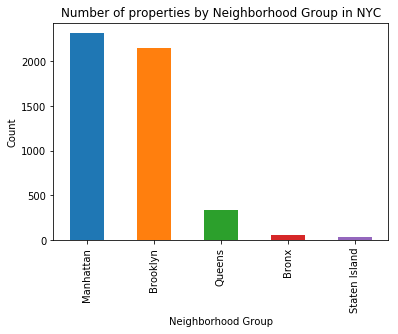

In [128]:
final_df['neighbourhood_group_cleansed'].value_counts().plot(kind = "bar")
plt.title("Number of properties by Neighborhood Group in NYC")
plt.xlabel("Neighborhood Group")
plt.ylabel("Count")
plt.show()

In [139]:
final_df.zipcode.value_counts()

11211    297
11238    187
10002    172
11221    168
10009    160
11216    147
11215    144
10019    140
10003    134
11222    132
11206    113
10025    112
10036    108
10011    106
11249    106
10012    103
11233    102
10014     95
10027     95
11217     86
11205     84
10013     82
11231     74
10016     72
10024     71
10031     71
11237     71
11201     69
10023     65
10029     65
        ... 
11691      2
10473      2
11426      2
11001      2
11694      2
11378      2
10306      2
11204      2
10466      2
10461      1
11219      1
10312      1
11433      1
10020      1
11355      1
10103      1
11379      1
10162      1
11436      1
11432      1
11420      1
11360      1
11356      1
10278      1
10310      1
10460      1
10308      1
10044      1
10458      1
10111      1
Name: zipcode, Length: 151, dtype: int64

# Number of properties by zipcode. Highest number of properties are in zipcode 11211, 11238, 10002

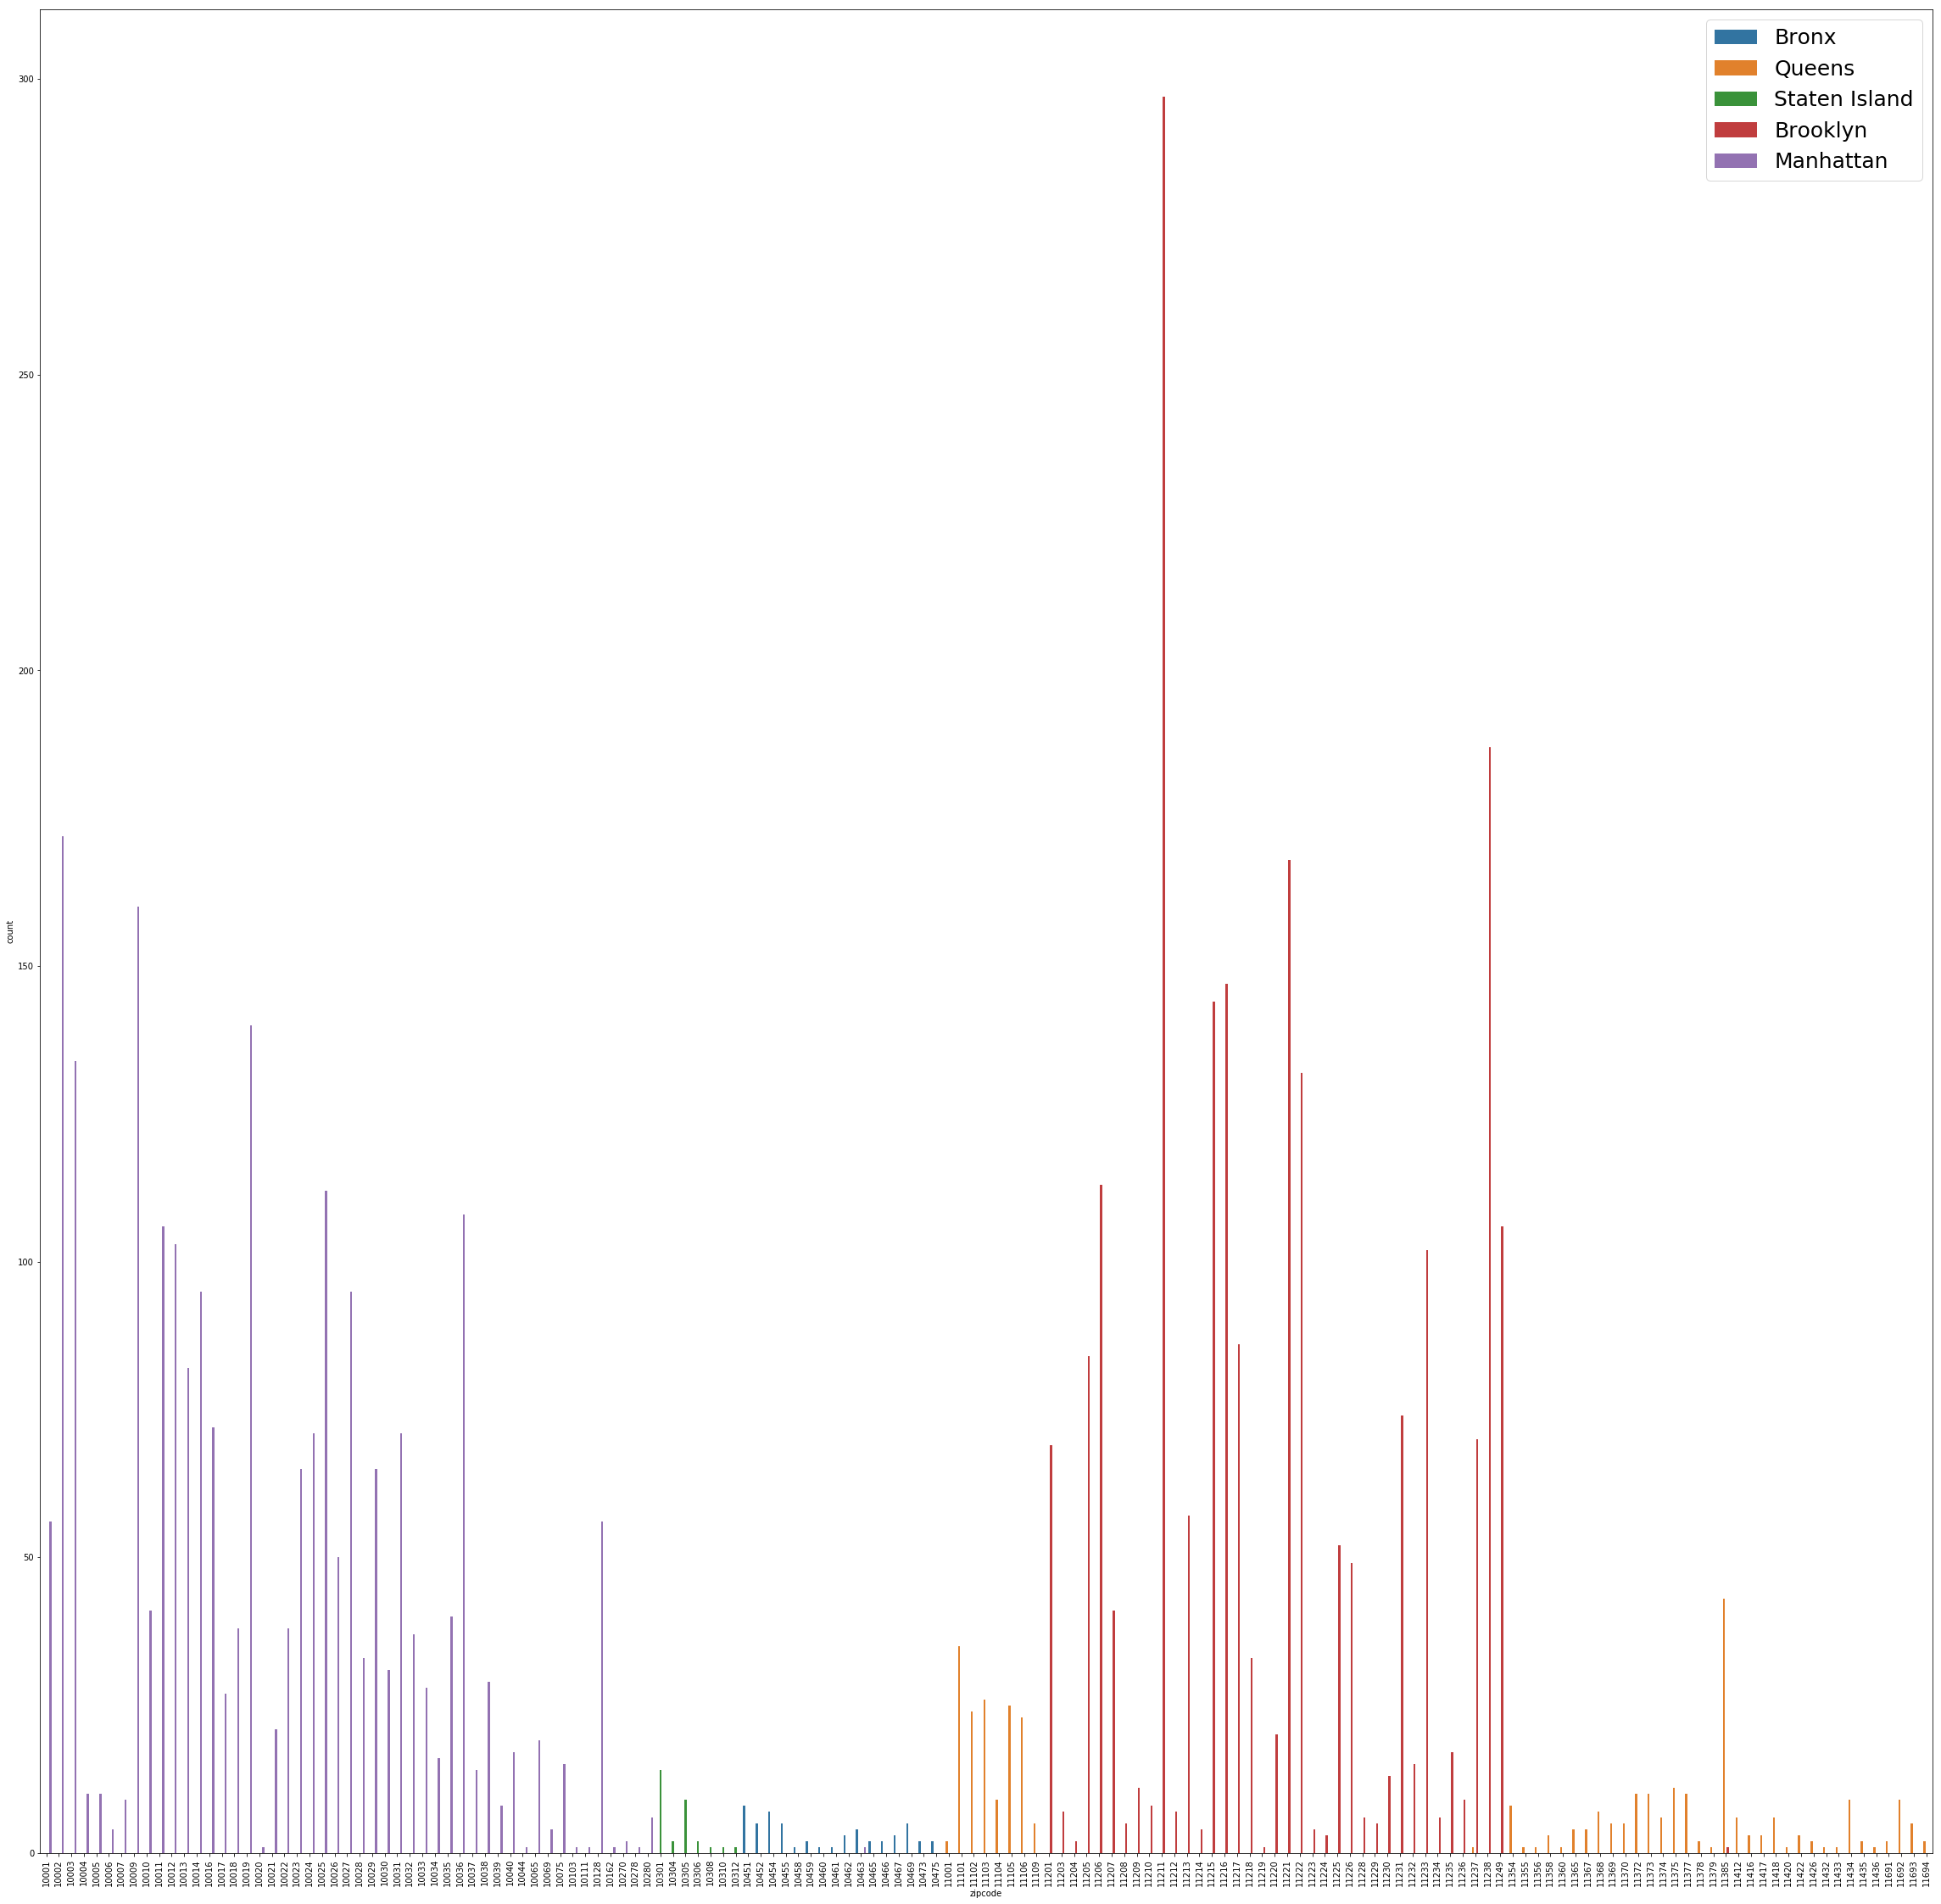

In [136]:
plt.figure(figsize=(40,40))
sns.countplot(x='zipcode',hue='neighbourhood_group_cleansed',data=final_df)
plt.xticks(rotation=90)
plt.legend(prop={'size': 25})
plt.savefig('zipcode.png')
plt.show()

# Property Cost by ZipCode: We are only looking at 2017 cost. Since, we are looking at the profitability per zipcode, this visualization is very important. We observe that Manahttan has the most expensive properties. But if it does not generate proportional revenue then the profit made on these properties might be considerably low. Brooklyn is the second most expensive areas in NY. 

In [153]:
final_df.head()

,last_scraped,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,instant_bookable,PopulationRank,Cost_2017
0,2017-05-03,Allerton,Bronx,10462,40.858,-73.866,Apartment,Entire home/apt,4,1.000,...,0,0,0,0,4,2016-07-11,2016-11-07,f,nan,nan
1,2017-05-04,Allerton,Bronx,10469,40.871,-73.847,Apartment,Entire home/apt,16,1.000,...,22,50,75,346,31,2015-02-19,2017-04-26,f,nan,nan
2,2017-05-05,Ditmars Steinway,Queens,11102,40.772,-73.918,Apartment,Entire home/apt,4,1.000,...,0,0,0,0,0,0,0,f,nan,nan
3,2017-05-05,Ditmars Steinway,Queens,11102,40.779,-73.916,Apartment,Private room,4,1.000,...,30,60,90,180,0,0,0,t,nan,nan
4,2017-05-04,Ditmars Steinway,Queens,11105,40.781,-73.910,Apartment,Entire home/apt,6,1.000,...,27,57,87,362,1,2017-04-11,2017-04-11,f,nan,nan


In [159]:
final_valid_cost_df = final_df[final_df.Cost_2017.notnull()]

In [160]:
final_valid_cost_df.shape

(1253, 23)

In [163]:
#Since we want median cost for properties for a zipcode, we will create a new df which does not have duplicate zip code entry
zipcode_cost_df = final_valid_cost_df.drop_duplicates(subset='zipcode')

In [164]:
zipcode_cost_df.shape

(22, 23)

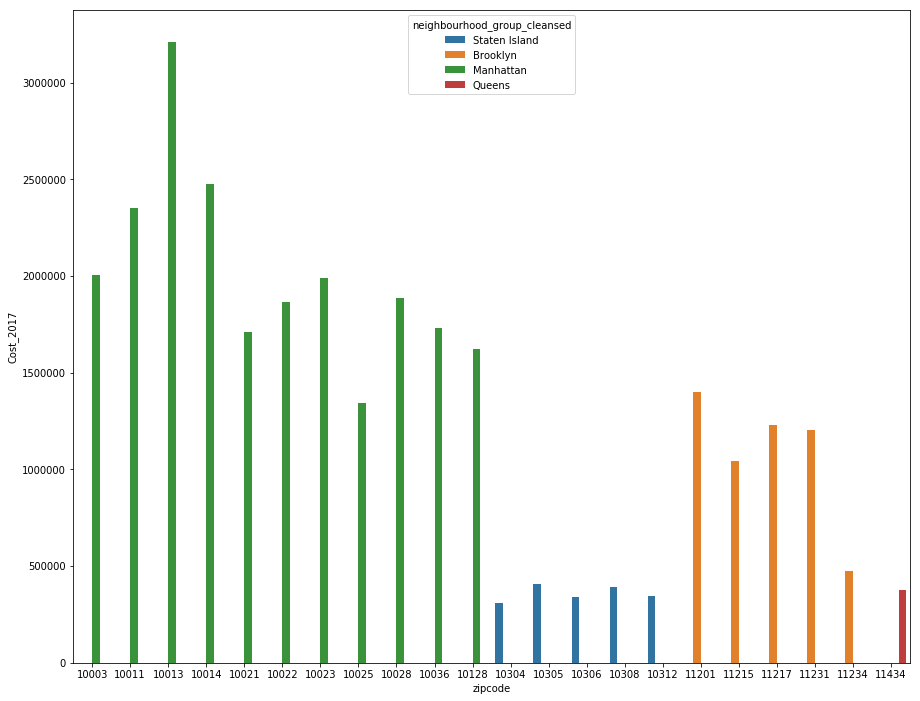

In [165]:
plt.figure(figsize=(15,12))
sns.barplot(x='zipcode', y='Cost_2017', data = zipcode_cost_df, hue='neighbourhood_group_cleansed')

# It would also be interesting to see which property types are more expensive. It looks like that loft in Manhattans are the most expensive property types.  

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


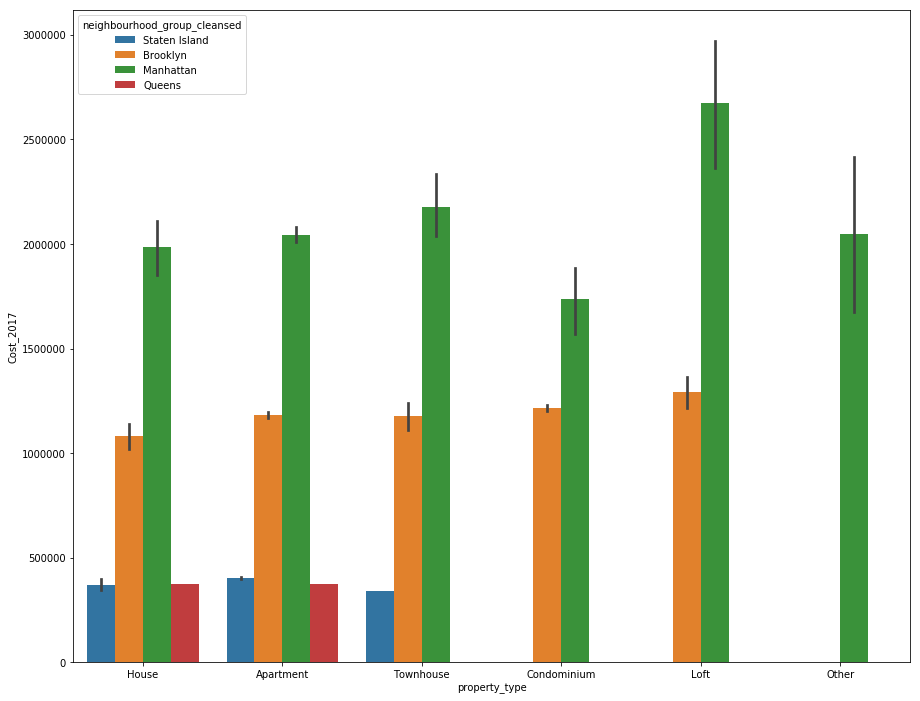

In [166]:
plt.figure(figsize=(15,12))
sns.barplot(x='property_type', y='Cost_2017', data = final_valid_cost_df, hue='neighbourhood_group_cleansed')

# Now to explore the revenue aspect, first we will plot price per night of each properties by Zipcode. We see that zipcode in Manhattan has the highest  price per night followed by Brooklyn Also, looking at the boxplot, it can be observed that in Manhattan there are properties which are quite expensive than the rest. We see a number of outliers in the price. 

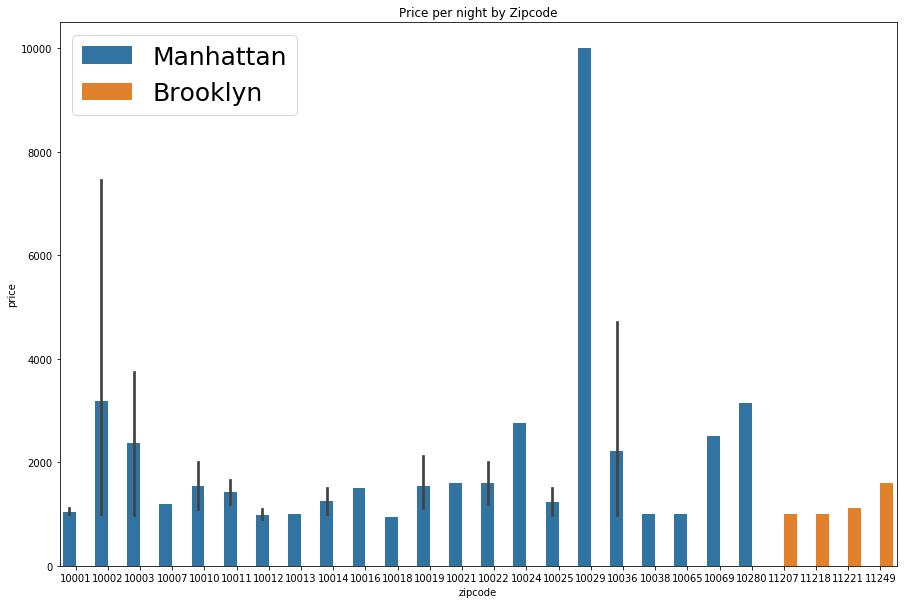

In [186]:
plt.figure(figsize=(15,10))

temp_df = final_df.sort_values(by=['price'], ascending=False).head(50).reset_index(drop=True)

sns.barplot(x='zipcode', y='price', data = temp_df, hue='neighbourhood_group_cleansed')
plt.title('Price per night by Zipcode')
plt.legend(prop={'size': 25})
plt.savefig('zipcode.png')
plt.show()

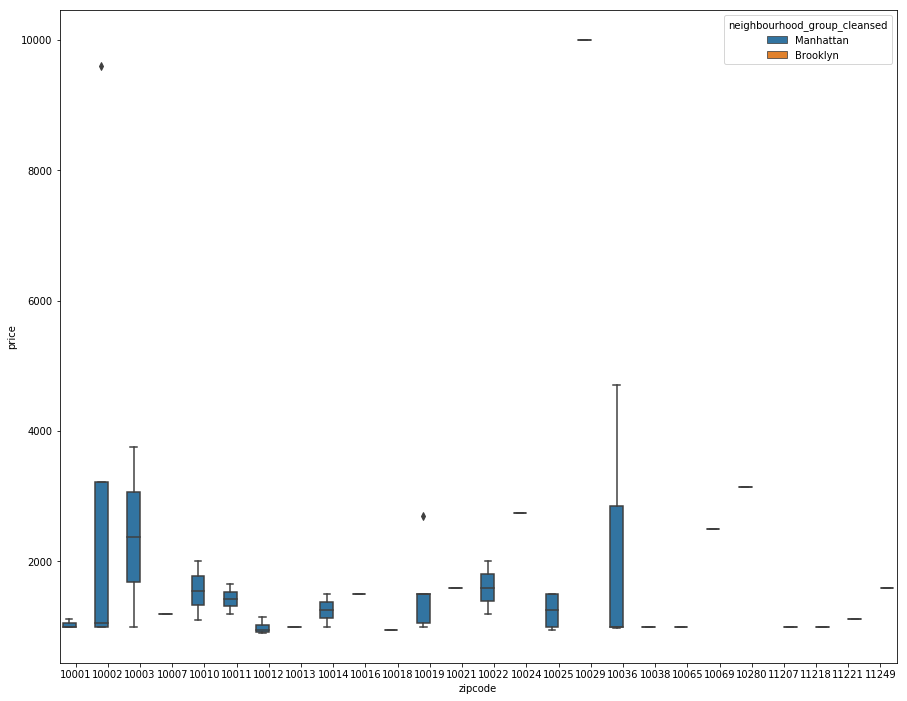

In [187]:
plt.figure(figsize=(15,12))
sns.boxplot(x="zipcode", y="price", data=temp_df, hue= 'neighbourhood_group_cleansed')

Text(0,0.5,'Density')

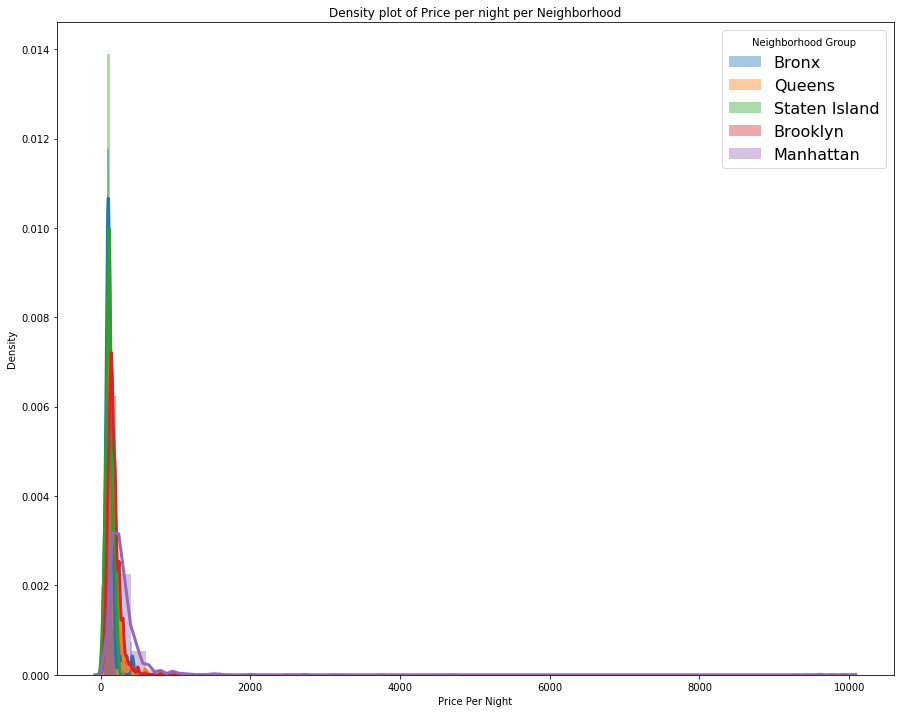

In [188]:
plt.figure(figsize=(15,12))
neighborhoods = final_df['neighbourhood_group_cleansed'].unique()

# Iterate through the five airlines
for neighborhood in neighborhoods:
    # Subset to the airline
    subset = final_df[final_df['neighbourhood_group_cleansed'] == neighborhood]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = True, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = neighborhood)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Neighborhood Group')
plt.title('Density plot of Price per night per Neighborhood')
plt.xlabel('Price Per Night')
plt.ylabel('Density')

# We will try to understand availability in terms of price. There is no set pattern between availability and price per night

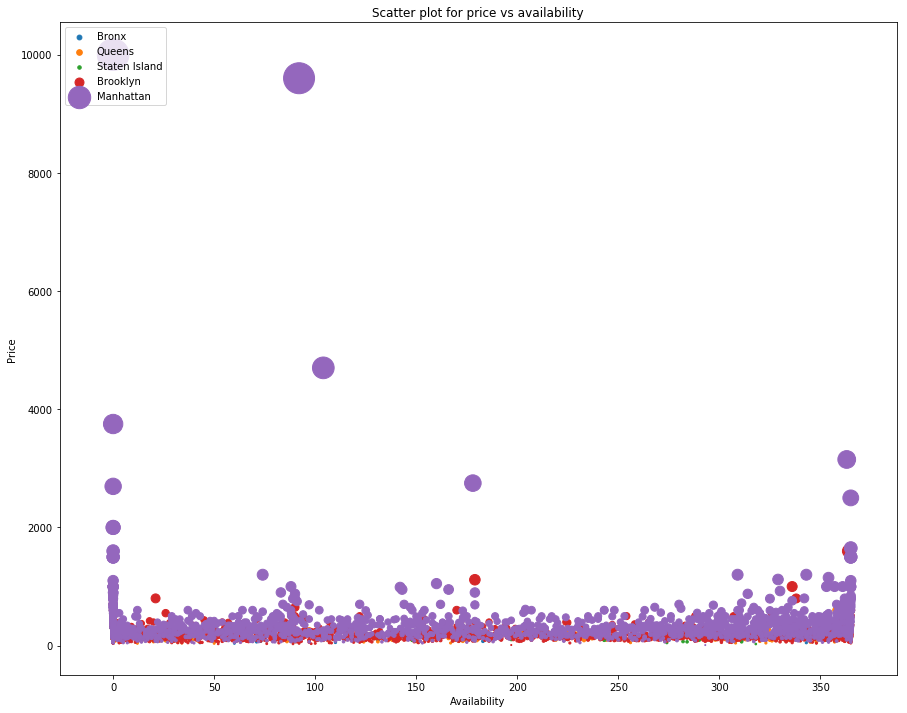

In [191]:
neighborhoods = final_df['neighbourhood_group_cleansed'].unique()

# Iterate through each neighborhood group
for index, neighborhood in enumerate(neighborhoods):

    # Subset to the neighborhood_group 
    subset = final_df[final_df['neighbourhood_group_cleansed'] == neighborhood]
    
    # Draw the density plot
    plt.scatter(subset['availability_365'], subset['price'], s= 0.1*subset['price'], cmap= 'viridis', label=neighborhood)

plt.title('Scatter plot for price vs availability')
plt.legend(loc=2)
plt.xlabel('Availability')
plt.ylabel('Price')
plt.show()

# Corrected Price by Room Type: The provided price per night is not the price for the entire property. In order to find the price per night for the entire property, we have to check the field room_type. It indicates whether the rental is entire home/apt or a private room. Based on this, we have made following assumption: If the property type == private room, we will multiply the price with number of bedroom to calculate the overall price. 

# Hence, total revenue generated by each property in a year = Overall_price * availability_365 * 0.75 (assuming 75% occupancy rate) 

In [194]:
final_df.isnull().sum()

last_scraped                       0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
zipcode                            0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
beds                               0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review                       0
last_review                        0
instant_bookable                   0
PopulationRank                  3640
Cost_2017                       3640
Revenue                            0
dtype: int64

In [192]:
def calculate_revenue(row):
    if row['room_type'] == 'Private room':
        return (2*row['price']*0.75*row['availability_365'])
    else: 
        return (row['price']*0.75*row['availability_365'])

final_df['Revenue'] = final_df.apply(calculate_revenue, axis = 1)

In [193]:
final_df.head()

,last_scraped,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,instant_bookable,PopulationRank,Cost_2017,Revenue
0,2017-05-03,Allerton,Bronx,10462,40.858,-73.866,Apartment,Entire home/apt,4,1.000,...,0,0,0,4,2016-07-11,2016-11-07,f,nan,nan,0.000
1,2017-05-04,Allerton,Bronx,10469,40.871,-73.847,Apartment,Entire home/apt,16,1.000,...,50,75,346,31,2015-02-19,2017-04-26,f,nan,nan,38925.000
2,2017-05-05,Ditmars Steinway,Queens,11102,40.772,-73.918,Apartment,Entire home/apt,4,1.000,...,0,0,0,0,0,0,f,nan,nan,0.000
3,2017-05-05,Ditmars Steinway,Queens,11102,40.779,-73.916,Apartment,Private room,4,1.000,...,60,90,180,0,0,0,t,nan,nan,67500.000
4,2017-05-04,Ditmars Steinway,Queens,11105,40.781,-73.910,Apartment,Entire home/apt,6,1.000,...,57,87,362,1,2017-04-11,2017-04-11,f,nan,nan,21448.500


In [196]:
#calculating total revenue generated for a region
revenue_df = pd.DataFrame(final_df.groupby('zipcode')['Revenue'].sum())
revenue_df = revenue_df.reset_index()
revenue_df.head()

,zipcode,Revenue
0,10001,2952535.500
1,10002,6902997.000
2,10003,4035651.000
3,10004,687936.750
4,10005,320862.750


In [197]:
zipcode_cost_df = final_valid_cost_df.drop_duplicates(subset='zipcode')
zipcode_cost_df = zipcode_cost_df[['zipcode', 'Cost_2017', 'neighbourhood_group_cleansed']]
zipcode_cost_df = zipcode_cost_df.reset_index(drop = True)
zipcode_cost_df.columns=['zipcode', 'median_cost', 'neighbourhood_group_cleansed']
zipcode_cost_df.head()

,zipcode,median_cost,neighbourhood_group_cleansed
0,10305,407900.000,Staten Island
1,11201,1400200.000,Brooklyn
2,11217,1231850.000,Brooklyn
3,10013,3212450.000,Manhattan
4,11231,1202550.000,Brooklyn


In [201]:
revenue_df.shape

(151, 2)

In [203]:
zipcode_cost_df.shape

(22, 3)

# To understand profitability and breakeven period, we will do inner join of revenue df and zipcode_cost_df, since we don't want to include zip codes whose cost is not provided

In [198]:
final_cost_revenue_df = pd.merge(revenue_df, zipcode_cost_df, on='zipcode')

In [200]:
final_cost_revenue_df.shape

(22, 4)

In [204]:
temp_df = final_cost_revenue_df.sort_values(by=['Revenue'], ascending=False).head(10).reset_index(drop=True)

print(tabulate(temp_df, headers='keys', tablefmt='psql', floatfmt=".2f"))

+----+-----------+------------+---------------+--------------------------------+
|    |   zipcode |    Revenue |   median_cost | neighbourhood_group_cleansed   |
|----+-----------+------------+---------------+--------------------------------|
|  0 |     10036 | 4959129.75 |    1729150.00 | Manhattan                      |
|  1 |     10011 | 4264544.25 |    2354000.00 | Manhattan                      |
|  2 |     10013 | 4109049.00 |    3212450.00 | Manhattan                      |
|  3 |     10003 | 4035651.00 |    2005500.00 | Manhattan                      |
|  4 |     10014 | 3238188.00 |    2476250.00 | Manhattan                      |
|  5 |     10025 | 2998412.25 |    1342900.00 | Manhattan                      |
|  6 |     11215 | 2094783.00 |    1045400.00 | Brooklyn                       |
|  7 |     10022 | 1635963.00 |    1863650.00 | Manhattan                      |
|  8 |     10023 | 1588314.00 |    1988700.00 | Manhattan                      |
|  9 |     11231 | 1523037.0

In [205]:
temp_df = final_cost_revenue_df.sort_values(by=['median_cost'], ascending=False).head(10).reset_index(drop=True)

print(tabulate(temp_df, headers='keys', tablefmt='psql', floatfmt=".2f"))

+----+-----------+------------+---------------+--------------------------------+
|    |   zipcode |    Revenue |   median_cost | neighbourhood_group_cleansed   |
|----+-----------+------------+---------------+--------------------------------|
|  0 |     10013 | 4109049.00 |    3212450.00 | Manhattan                      |
|  1 |     10014 | 3238188.00 |    2476250.00 | Manhattan                      |
|  2 |     10011 | 4264544.25 |    2354000.00 | Manhattan                      |
|  3 |     10003 | 4035651.00 |    2005500.00 | Manhattan                      |
|  4 |     10023 | 1588314.00 |    1988700.00 | Manhattan                      |
|  5 |     10028 |  502900.50 |    1885350.00 | Manhattan                      |
|  6 |     10022 | 1635963.00 |    1863650.00 | Manhattan                      |
|  7 |     10036 | 4959129.75 |    1729150.00 | Manhattan                      |
|  8 |     10021 |  279475.50 |    1709950.00 | Manhattan                      |
|  9 |     10128 | 1284585.7

# Breakeven Period analysis: To understand the profitability for a zip code, I am using the return on assets ratio (ROA), it is a profitability ratio that measures the net income produced by total assets during a period by comparing net income to the average total assets. Breakeven Period represents the time that net income can cover total cost. 

# Return Ration = Total Revenue Generated or Expected Return / Total Assets (Cost Price)
# Breakeven Period = 1/Return Ratio

In [206]:
final_cost_revenue_df.isnull().sum()

zipcode                         0
Revenue                         0
median_cost                     0
neighbourhood_group_cleansed    0
dtype: int64

In [207]:
def calculateROA(row): 
    return(row['Revenue']/row['median_cost'])

final_cost_revenue_df['ROA'] = final_cost_revenue_df.apply(calculateROA, axis = 1)

In [212]:
def calculateBreakevenPeriod(row): 
    return(1/row['ROA'])

final_cost_revenue_df['breakeven_period'] = final_cost_revenue_df.apply(calculateBreakevenPeriod, axis = 1)

In [215]:
final_cost_revenue_df

,zipcode,Revenue,median_cost,neighbourhood_group_cleansed,ROA,breakeven_period
0,10003,4035651.000,2005500.000,Manhattan,2.012,0.497
1,10011,4264544.250,2354000.000,Manhattan,1.812,0.552
2,10013,4109049.000,3212450.000,Manhattan,1.279,0.782
3,10014,3238188.000,2476250.000,Manhattan,1.308,0.765
4,10021,279475.500,1709950.000,Manhattan,0.163,6.118
5,10022,1635963.000,1863650.000,Manhattan,0.878,1.139
6,10023,1588314.000,1988700.000,Manhattan,0.799,1.252
7,10025,2998412.250,1342900.000,Manhattan,2.233,0.448
8,10028,502900.500,1885350.000,Manhattan,0.267,3.749
9,10036,4959129.750,1729150.000,Manhattan,2.868,0.349


Text(0.5,1,'Return Ratio of Properties by ZipCode')

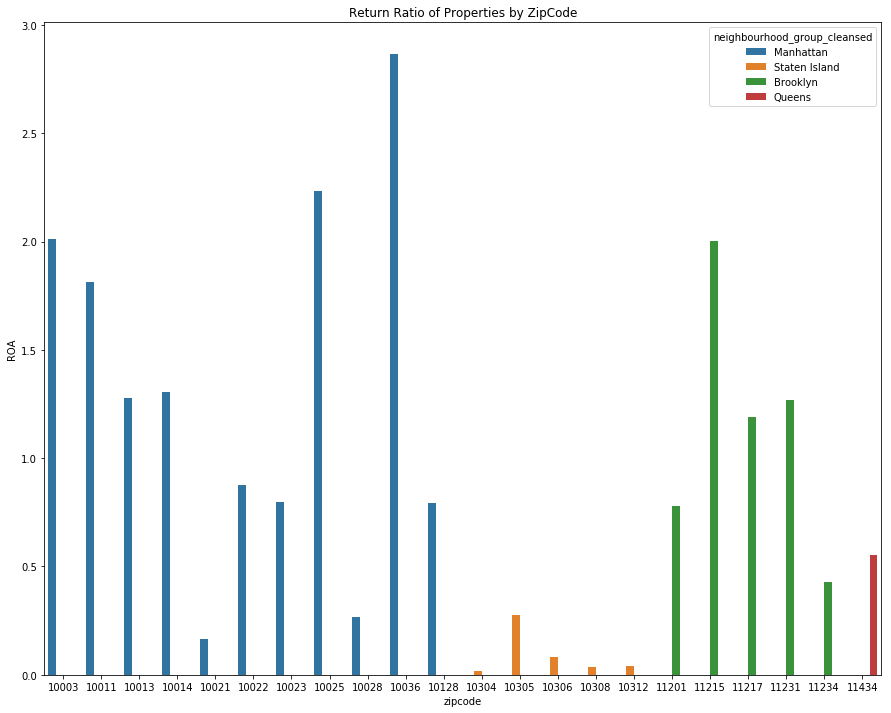

In [216]:
plt.figure(figsize=(15,12))
sns.barplot(x='zipcode', y='ROA', data = final_cost_revenue_df, hue='neighbourhood_group_cleansed')
plt.title('Return Ratio of Properties by ZipCode')

Text(0.5,1,'Breakeven Period of Properties by ZipCode')

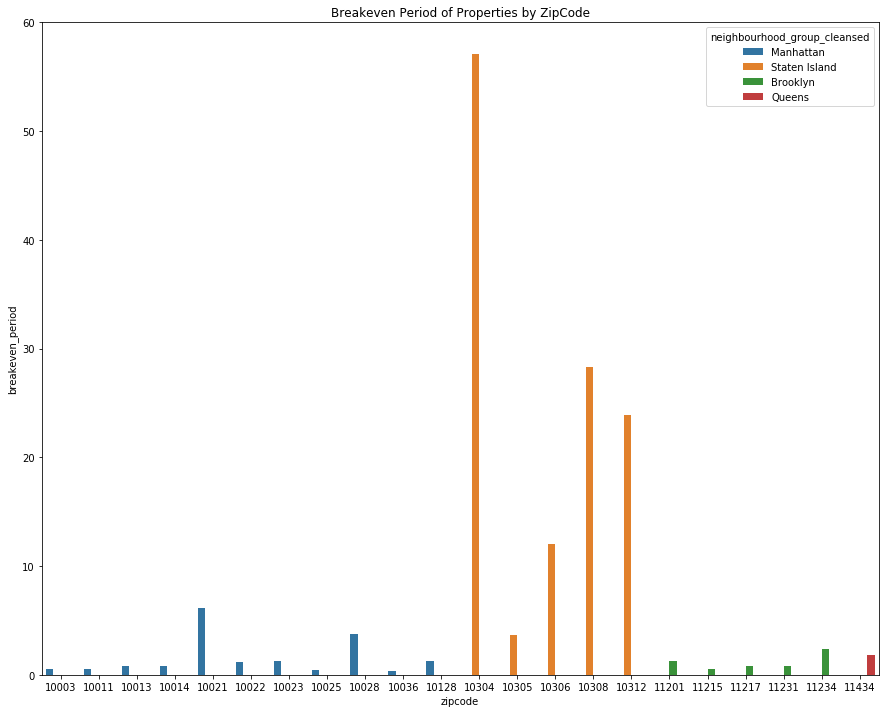

In [217]:
plt.figure(figsize=(15,12))
sns.barplot(x='zipcode', y='breakeven_period', data = final_cost_revenue_df, hue='neighbourhood_group_cleansed')
plt.title('Breakeven Period of Properties by ZipCode')

# Profit Calculation: This is a very simple profit calculation assumption. 

1.	We have calculated the yearly revenue generated by properties for a specific zip code 
2.	We have the median cost of the properties for a zip code
3.	For the scope of this project, I am assuming that there is no overhead expense apart from the cost of the properties and the revenue generated is only from the rentals occupied at an occupancy rate of 75% 
4.	Hence, Profit = Revenue – Cost 


In [218]:
def calculateProfit(row): 
    return(row['Revenue'] - row['median_cost'])

final_cost_revenue_df['Profit'] = final_cost_revenue_df.apply(calculateProfit, axis = 1)

In [221]:
final_cost_revenue_df

,zipcode,Revenue,median_cost,neighbourhood_group_cleansed,ROA,breakeven_period,Profit
0,10003,4035651.000,2005500.000,Manhattan,2.012,0.497,2030151.000
1,10011,4264544.250,2354000.000,Manhattan,1.812,0.552,1910544.250
2,10013,4109049.000,3212450.000,Manhattan,1.279,0.782,896599.000
3,10014,3238188.000,2476250.000,Manhattan,1.308,0.765,761938.000
4,10021,279475.500,1709950.000,Manhattan,0.163,6.118,-1430474.500
5,10022,1635963.000,1863650.000,Manhattan,0.878,1.139,-227687.000
6,10023,1588314.000,1988700.000,Manhattan,0.799,1.252,-400386.000
7,10025,2998412.250,1342900.000,Manhattan,2.233,0.448,1655512.250
8,10028,502900.500,1885350.000,Manhattan,0.267,3.749,-1382449.500
9,10036,4959129.750,1729150.000,Manhattan,2.868,0.349,3229979.750


In [233]:
temp_df = final_cost_revenue_df[final_cost_revenue_df.Profit > 0]
temp_df = temp_df.reset_index()

temp_df = temp_df.sort_values(by=['ROA'], ascending=False)

temp_df

,index,zipcode,Revenue,median_cost,neighbourhood_group_cleansed,ROA,breakeven_period,Profit
5,9,10036,4959129.750,1729150.000,Manhattan,2.868,0.349,3229979.750
4,7,10025,2998412.250,1342900.000,Manhattan,2.233,0.448,1655512.250
0,0,10003,4035651.000,2005500.000,Manhattan,2.012,0.497,2030151.000
6,17,11215,2094783.000,1045400.000,Brooklyn,2.004,0.499,1049383.000
1,1,10011,4264544.250,2354000.000,Manhattan,1.812,0.552,1910544.250
3,3,10014,3238188.000,2476250.000,Manhattan,1.308,0.765,761938.000
2,2,10013,4109049.000,3212450.000,Manhattan,1.279,0.782,896599.000
8,19,11231,1523037.000,1202550.000,Brooklyn,1.267,0.790,320487.000
7,18,11217,1463346.750,1231850.000,Brooklyn,1.188,0.842,231496.750
